# Практическое задание

В этом практическом задании мы поработаем с алгоритмом линейной регрессии и нормализацией признаков. Для начала загрузите данные из файла `data.csv`, который содержит 100 признаков f1, f2, ..., f100 и целевую переменную target. Для загрузки данных используете функцию `read_csv` из библиотеки `pandas`. Выделите матрицу признаков и целевую переменную из загруженных данных.

### *РЕШЕНИЕ*

<Figure size 432x288 with 0 Axes>

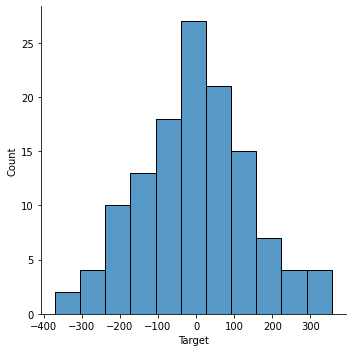

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

t = pd.read_csv( "task-3.1/data.csv" )

data   = t.iloc[:,0:100 ]
target = t["target"]

plt.figure(figsize=(6,4))
sns.displot(target)

plt.xlabel("Target")
plt.ylabel("Count")
plt.tight_layout()

Далее, разделите загруженный датасет на тренировочную и тестовую выборку. Для этого используйте функцию `train_test_split` из модуля `sklearn.model_selection` с параметрами `random_state=42` и `test_size=0.33`. Обучите линейную регрессию на тренировочных данных и оцените среднеквадратическую ошибку на тестовых данных. Один из вариантов линейной регрессии в `scikit-learn` представлен классом `Ridge` из `sklearn.linear_model`.
Используйте параметр `random_state=42` в конструкторе класса при создании его экземпляра. Оценку среднеквадратичной ошибки проведите с помощью функции `mean_squared_error` из модуля `sklearn.metrics`. В качестве ответа `answer1` приведите это значение округлённое с точностью до двух знаков.

### *РЕШЕНИЕ*

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.33, random_state=42)

ridge = Ridge(random_state=42)

# обучение
model = ridge.fit(data_train, target_train)

# предсказание
predicted = model.predict(data_test)

# cреднеквадратичное отклонение
mse = mean_squared_error(target_test, predicted)

accuracy = model.score(data_test, target_test)
print("Accuracy:", accuracy)
print("R2:      ", r2_score(target_test, predicted))


Accuracy: 0.8222756051846474
R2:       0.8222756051846474


In [3]:
answer1 = mse
answer1

4921.829721173706

In [4]:
# несколько линейных регрессий

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

linear = LinearRegression()
ridge  = Ridge(random_state=42)
lasso  = Lasso(random_state=42)
elast  = ElasticNet(random_state=42)

for mod in [linear, ridge, lasso, elast]:
    
    model = mod.fit(data_train, target_train)
    predicted = model.predict(data_test)
    accuracy = model.score(data_test, target_test)
    print("{}: Accuracy {}".format(mod.__class__, accuracy))



<class 'sklearn.linear_model._base.LinearRegression'>: Accuracy 0.8441560531762782
<class 'sklearn.linear_model._ridge.Ridge'>: Accuracy 0.8222756051846474
<class 'sklearn.linear_model._coordinate_descent.Lasso'>: Accuracy 0.999156061537378
<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>: Accuracy 0.5612314196466308


Далее вам предлагается стандартизовать данные используя `StandardScaler` из `sklearn.preprocessing`. По своей сути операция стандартизации в данном случае представляет из себя вычитание среднего из матрицы признаков и деление на среднеквадратическое отклонение. 

<font color  = "red">Важно:</font> Сначала следует разбить выборку на тренировочную и тестовую и лишь потом стандартизировать их по отдельности. Помните, что к тренировочной выборке мы должны применять метод `fit_transform()`, а к тестовой только `transform()`. Как изменилось качество на тестовых данных? В `answer2` запишите значение среднеквадратической ошибки, округлённое с точностью до двух знаков после запятой.

In [5]:
# сплитим данные и создаем регрессию
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.33, random_state=42)
ridge = Ridge(random_state=42)


## Стандартизация

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# тренироваочная дата, применять fit_transform()
data_train_sd = sc.fit_transform(data_train)

# тестовая дата, применять transform()
data_test_sd = sc.transform(data_test)

model_sd = ridge.fit(data_train_sd, target_train)  # train
predicted_sd = model_sd.predict(data_test_sd)         # test

mse_sd = mean_squared_error(target_test, predicted_sd)

accuracy_sd = model_sd.score(data_test_sd, target_test)
print("Accuracy:", accuracy_sd)



Accuracy: 0.8485210394392563


In [6]:
answer2 = mse_sd
answer2

4194.998953266735

## Строка с ответами

In [7]:
print('mse 1: {0:.2f}\nmse 2: {1:.2f}'.format(answer1, answer2))

mse 1: 4921.83
mse 2: 4195.00
